Date:2/9/22      CLUSTERING-2.Hirerichical clustering
                                1.Aggolomerative clustering

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
x=df.iloc[:,[3,4]].values
    


Text(0.5, 1.0, 'mall customer')

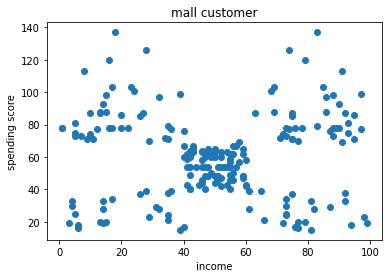

In [8]:
#dataset viewed in graph
#plot data points
plt.scatter(df['Spending Score (1-100)'],df['Annual Income (k$)'])
plt.xlabel('income')
plt.ylabel('spending score')
plt.title('mall customer')



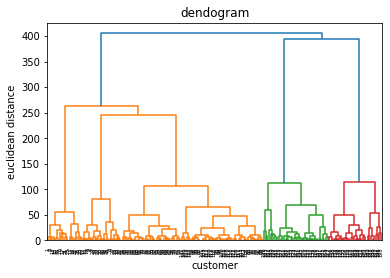

In [9]:
#dendogram
import scipy.cluster.hierarchy as sch
dedogram=sch.dendrogram(sch.linkage(x,method='ward'))

plt.title('dendogram')
plt.xlabel('customer')
plt.ylabel('euclidean distance')
plt.show()

#how to find how many clusters in dendrogram
#you need to find longest vertical line that has none of the horizontal line pass through it

In [25]:
from sklearn.cluster import AgglomerativeClustering
AC=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
label= AC.fit_predict(x)
label

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [26]:
supervised=pd.DataFrame(df)

In [27]:
supervised['Cluster_group']=label

In [28]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


C:\Users\Yaazh\anaconda3\envs\ai\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


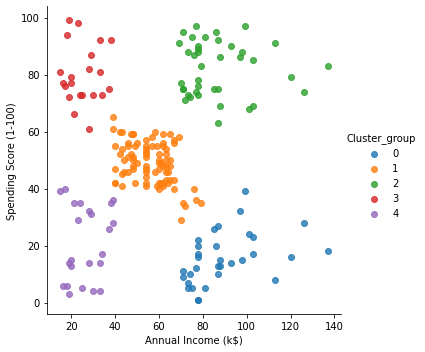

In [29]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], 
                   fit_reg=False, legend=True, legend_out=True)

In [30]:
#evalution metrics for clustering#silhoutte_score
from sklearn.metrics import silhouette_score
silhouette_score(x,label)

0.5529945955148897